In [1345]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [1346]:
# dataset_path = "data/training/"

In [1347]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [1348]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [1349]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/db5/data_mfccDWTcqtdb5L10.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-128.139694,9.249898,17.942024,-21.817772,-14.709490,12.002167,10.450064,23.728683,2.686324,...,0.137048,0.162237,0.183070,0.195775,0.195539,0.181207,0.152320,0.109630,0.060675,MR
1,../data/DWT/MR/New_MR_174.wav,-212.816010,1.245270,7.863413,13.829706,25.887451,-20.200340,-20.943745,11.641230,-7.220111,...,0.026997,0.024049,0.020120,0.015222,0.010156,0.009183,0.015600,0.024807,0.034866,MR
2,../data/DWT/MR/New_MR_182.wav,-211.159149,-9.500888,-7.657093,13.315939,23.633640,19.676632,4.766689,9.601788,-2.633998,...,0.023060,0.024654,0.025434,0.026142,0.027734,0.031588,0.037863,0.044773,0.051270,MR
3,../data/DWT/MR/New_MR_005.wav,-68.162659,8.291939,1.424835,-24.941879,-12.190618,29.982553,16.437721,-35.685547,1.119930,...,0.139298,0.182806,0.229200,0.275617,0.316117,0.348309,0.368095,0.367320,0.346331,MR
4,../data/DWT/MR/New_MR_067.wav,-246.607697,-17.193386,1.220184,-5.324224,-2.926184,-11.430851,3.765208,-15.173524,-7.959144,...,0.021118,0.020351,0.019211,0.017909,0.016845,0.017122,0.019614,0.023761,0.028875,MR


In [1350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 804.8+ KB


In [1351]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [1352]:
X.shape

(1000, 101)

In [1353]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [1354]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-128.139694,9.249898,17.942024,-21.817772,-14.709490,12.002167,10.450064,23.728683,2.686324,-21.641861,...,0.110485,0.137048,0.162237,0.183070,0.195775,0.195539,0.181207,0.152320,0.109630,0.060675
1,-212.816010,1.245270,7.863413,13.829706,25.887451,-20.200340,-20.943745,11.641230,-7.220111,18.668196,...,0.028945,0.026997,0.024049,0.020120,0.015222,0.010156,0.009183,0.015600,0.024807,0.034866
2,-211.159149,-9.500888,-7.657093,13.315939,23.633640,19.676632,4.766689,9.601788,-2.633998,-7.494317,...,0.020434,0.023060,0.024654,0.025434,0.026142,0.027734,0.031588,0.037863,0.044773,0.051270
3,-68.162659,8.291939,1.424835,-24.941879,-12.190618,29.982553,16.437721,-35.685547,1.119930,-5.163580,...,0.101018,0.139298,0.182806,0.229200,0.275617,0.316117,0.348309,0.368095,0.367320,0.346331
4,-246.607697,-17.193386,1.220184,-5.324224,-2.926184,-11.430851,3.765208,-15.173524,-7.959144,29.741016,...,0.021409,0.021118,0.020351,0.019211,0.017909,0.016845,0.017122,0.019614,0.023761,0.028875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-178.427536,0.717947,14.470528,-5.444901,11.362898,4.175935,-10.599043,-6.055088,0.129834,24.594021,...,0.049330,0.036841,0.021052,0.003285,0.015648,0.033299,0.048131,0.058745,0.063843,0.064245
996,-272.643951,11.049870,11.278919,2.617225,-0.457039,1.667772,27.300400,-11.634583,-14.417053,-2.726220,...,0.010919,0.011371,0.013205,0.016355,0.020237,0.024011,0.027127,0.028977,0.028714,0.026258
997,-252.554382,11.292652,2.214497,7.449500,23.609810,6.208314,4.474855,7.405454,9.949955,-5.331191,...,0.023710,0.024912,0.024164,0.021437,0.016764,0.011241,0.009588,0.015552,0.023650,0.030544
998,-246.082504,1.282940,-19.865650,6.488730,4.999519,5.748022,17.219517,4.099222,1.315855,-6.642939,...,0.019061,0.023668,0.028248,0.032451,0.035837,0.037551,0.037343,0.035002,0.030436,0.026261


In [1355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1356]:
y_test.shape

(200,)

In [1357]:
X_train.shape

(800, 101)

In [1358]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
29,-225.092789,29.445826,13.225080,-5.393723,-1.541280,0.269371,-1.038946,-4.949985,-8.443914,11.281673,...,0.035349,0.034761,0.033752,0.032644,0.031611,0.030920,0.031143,0.032336,0.033699,0.034635
535,-183.803223,-11.299509,26.039062,61.949184,61.733864,-9.848091,-36.103695,-5.998654,-24.154594,14.732195,...,0.009223,0.004803,0.002268,0.001814,0.002672,0.005795,0.011099,0.018223,0.026744,0.037725
695,-238.164688,-52.529427,2.172934,1.457475,-30.148548,-23.108555,0.924690,5.106555,0.773449,16.951944,...,0.027636,0.027336,0.026062,0.023872,0.020672,0.016486,0.011923,0.008585,0.009543,0.013703
557,-314.043365,-14.076556,9.711503,17.870279,45.159916,-21.754538,-22.686707,-18.616978,-15.550516,30.418722,...,0.005800,0.004579,0.003341,0.002058,0.000613,0.001700,0.004473,0.008128,0.012435,0.017152
836,-203.135361,-8.802858,0.662170,-17.413963,-12.525820,5.081322,-5.770211,-6.175164,21.405674,6.577140,...,0.048640,0.050847,0.051174,0.049066,0.044125,0.036780,0.030714,0.032225,0.041338,0.052051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-224.940399,-10.065220,15.710167,-9.649658,-14.203388,7.984177,22.630836,-0.463430,-8.258564,-8.260242,...,0.015440,0.023063,0.032606,0.042069,0.049908,0.054276,0.054266,0.049202,0.038853,0.025100
270,-165.688202,4.061986,4.388841,2.140906,14.002938,6.892225,-12.825585,0.455222,-3.169226,-34.770210,...,0.020619,0.033503,0.045566,0.055927,0.064015,0.068650,0.069689,0.066463,0.057476,0.045621
860,-163.629913,5.586366,-8.089041,-18.421921,15.560725,2.512780,3.404259,2.683954,-9.075467,10.041003,...,0.043738,0.044365,0.046304,0.051003,0.058800,0.068845,0.080111,0.090770,0.097800,0.099359
435,-195.189255,-11.193535,13.968361,5.745395,-7.194924,-18.234081,-18.786613,-32.981163,9.803524,9.574142,...,0.037969,0.031140,0.024352,0.019193,0.017096,0.017573,0.018875,0.020647,0.024545,0.033126


In [1359]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 101, 1)
(200, 101, 1)


In [1360]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [1361]:
# X_train.shape
# X_test.shape

In [1362]:
def build_model():
    model = models.Sequential(
        [
            layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Conv1D(32, (3) , activation="relu"),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [1363]:
model = build_model()
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_98 (Conv1D)          (None, 99, 64)            256       
                                                                 
 max_pooling1d_98 (MaxPoolin  (None, 50, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_99 (Conv1D)          (None, 48, 32)            6176      
                                                                 
 max_pooling1d_99 (MaxPoolin  (None, 24, 32)           0         
 g1D)                                                            
                                                                 
 flatten_49 (Flatten)        (None, 768)               0         
                                                                 
 dense_98 (Dense)            (None, 64)              

In [1364]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 4s 44ms/step - loss: 3.1333 - acc: 0.2262 - val_loss: 2.3644 - val_acc: 0.1800
Epoch 2/50
25/25 [==============================] - 1s 22ms/step - loss: 2.0077 - acc: 0.2325 - val_loss: 1.7713 - val_acc: 0.2200
Epoch 3/50
24/25 [===========================>..] - ETA: 0s - loss: 1.6806 - acc: 0.2461

25/25 [==============================] - 1s 23ms/step - loss: 1.6845 - acc: 0.2475 - val_loss: 1.7233 - val_acc: 0.1950
Epoch 4/50
25/25 [==============================] - 1s 36ms/step - loss: 1.6355 - acc: 0.2425 - val_loss: 1.6809 - val_acc: 0.2050
Epoch 5/50
25/25 [==============================] - 1s 28ms/step - loss: 1.6026 - acc: 0.2750 - val_loss: 1.6648 - val_acc: 0.2100
Epoch 6/50
25/25 [==============================] - 1s 22ms/step - loss: 1.5745 - acc: 0.2950 - val_loss: 1.6457 - val_acc: 0.2050
Epoch 7/50
25/25 [==============================] - 1s 28ms/step - loss: 1.5502 - acc: 0.3013 - val_loss: 1.6363 - val_acc: 0.2100
Epoch 8/50
25/25 [==============================] - 1s 28ms/step - loss: 1.5306 - acc: 0.3175 - val_loss: 1.6250 - val_acc: 0.2000
Epoch 9/50
25/25 [==============================] - 1s 34ms/step - loss: 1.5137 - acc: 0.3225 - val_loss: 1.6080 - val_acc: 0.2400
Epoch 10/50
25/25 [==============================] - 0s 20ms/step - loss: 1.4933 - acc: 0.3450

7/7 [==============================] - 0s 3ms/step - loss: 1.5418 - acc: 0.3300
Accuracy on test set is: 0.33000001311302185


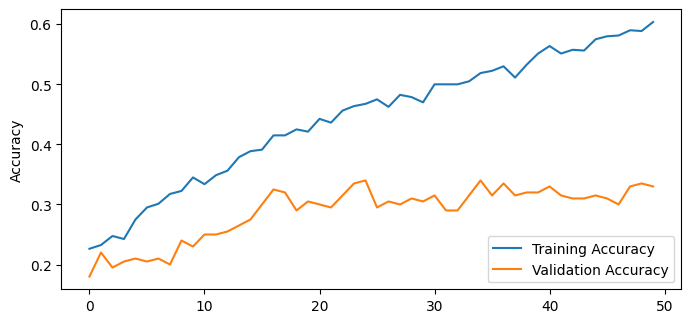

In [1365]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

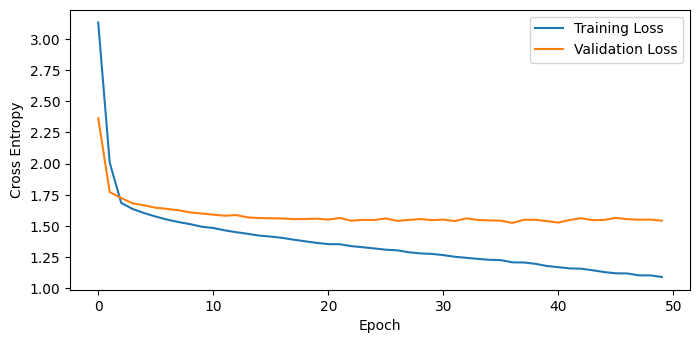

In [1366]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [1367]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 0s 6ms/step


array([[14,  6, 13,  2, 13],
       [ 3, 19,  0,  5,  6],
       [10,  5, 10,  5,  8],
       [10, 11,  5, 11,  7],
       [ 7,  7,  7,  4, 12]])

In [1368]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.32      0.29      0.30        48
           1       0.40      0.58      0.47        33
           2       0.29      0.26      0.27        38
           3       0.41      0.25      0.31        44
           4       0.26      0.32      0.29        37

    accuracy                           0.33       200
   macro avg       0.33      0.34      0.33       200
weighted avg       0.33      0.33      0.32       200



### Testing

In [1369]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_98 (Conv1D)          (None, 99, 64)            256       
                                                                 
 max_pooling1d_98 (MaxPoolin  (None, 50, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_99 (Conv1D)          (None, 48, 32)            6176      
                                                                 
 max_pooling1d_99 (MaxPoolin  (None, 24, 32)           0         
 g1D)                                                            
                                                                 
 flatten_49 (Flatten)        (None, 768)               0         
                                                                 
 dense_98 (Dense)            (None, 64)              

In [1370]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [1371]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 0s 126ms/step
[1.61227726e-05 9.91592169e-01 1.07958076e-04 8.21309630e-03
 7.05548082e-05]
1
Predicted class: MR
